In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import datetime
from scipy.stats import pearsonr

In [9]:
data_c=pd.read_csv('data_c.csv')

In [10]:
data_c.info()
data_c.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2237 non-null   int64  
 1   ID                   2237 non-null   int64  
 2   Year_Birth           2237 non-null   int64  
 3   Education            2237 non-null   object 
 4   Marital_Status       2237 non-null   object 
 5   Income               2237 non-null   float64
 6   Kidhome              2237 non-null   int64  
 7   Teenhome             2237 non-null   int64  
 8   Dt_Customer          2237 non-null   object 
 9   Recency              2237 non-null   int64  
 10  MntWines             2237 non-null   int64  
 11  MntFruits            2237 non-null   int64  
 12  MntMeatProducts      2237 non-null   int64  
 13  MntFishProducts      2237 non-null   int64  
 14  MntSweetProducts     2237 non-null   int64  
 15  MntGoldProds         2237 non-null   i

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
any_promo              0
dtype: int64

In [11]:
# We can also create more convinient features to continue Exploring our data.
#1.total products purchased 
#2.total spent
#3.days_customer: how many days since became a customer

data_c['Total_products']=data_c[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)

data_c['Total_spent']=data_c[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

#data_c['years_customer']=data_c['Dt_Customer'].max()-data_c['Dt_Customer']

#print(data_c.head().T)
#data_c.columns
#data_c.years_customer.head()


In [12]:
print(data_c['Dt_Customer'].max())
print(data_c['Dt_Customer'].iloc[0])
print(data_c['Dt_Customer'].iloc[1])

2014-12-06
2012-04-09
2014-08-03


In [13]:
data_c['Dt_Customer']=pd.to_datetime(data_c['Dt_Customer'])
data_c['days_customer']=data_c['Dt_Customer'].apply(lambda c: ((data_c['Dt_Customer']).max()-(c)).days)
data_c['Dt_Customer'].head()
data_c['days_customer']

0       971
1       125
2       472
3        65
4       321
       ... 
2232    541
2233     61
2234    315
2235    316
2236    782
Name: days_customer, Length: 2237, dtype: int64

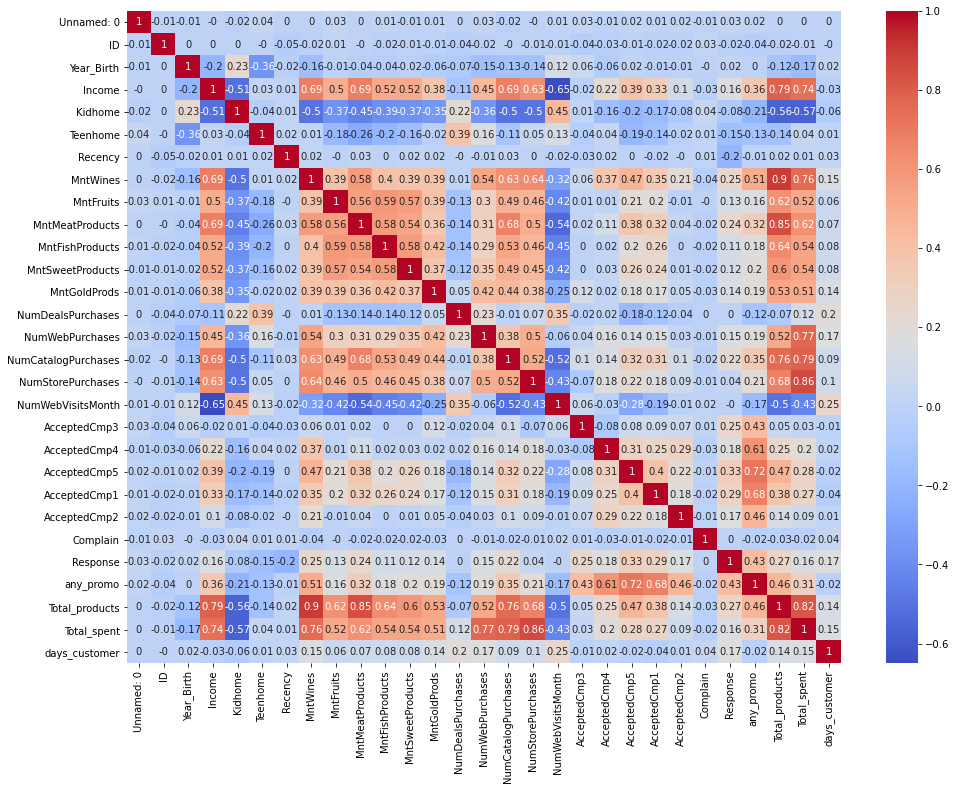

In [14]:
# We can start with general correlation between all features.
corr_map=data_c.corr()
fig, ax=plt.subplots(figsize=(16,12))
ax=sns.heatmap(round(corr_map,2), annot=True, cmap="coolwarm")
#pd.heatmap(data_c)

In [15]:
#Income positively correlated with genraly any kind of purcheses, mostly meat wine, in store and catalog.
#income negatively correlated with web visits.
# webvisits neg with income, buying fresh foods like meat fish, those parchesed more via catlog , next in store.
# all type of purchsee are intercorrelated.
#kids at home, correlated with less this type of purchesing, more web visits, less store vissits.
#Wines were more correlated with responding to promotions.
# privios response to promotions correlated with recent.
#deal teens and web visits.
# web visits not correlated with web purchases but negatively with catalog or store visits.Other purposes or products.
#Total spent also coretakes with general products purchases,slightly negatively with having small kids 
#and also corralates with rparchesing deals.

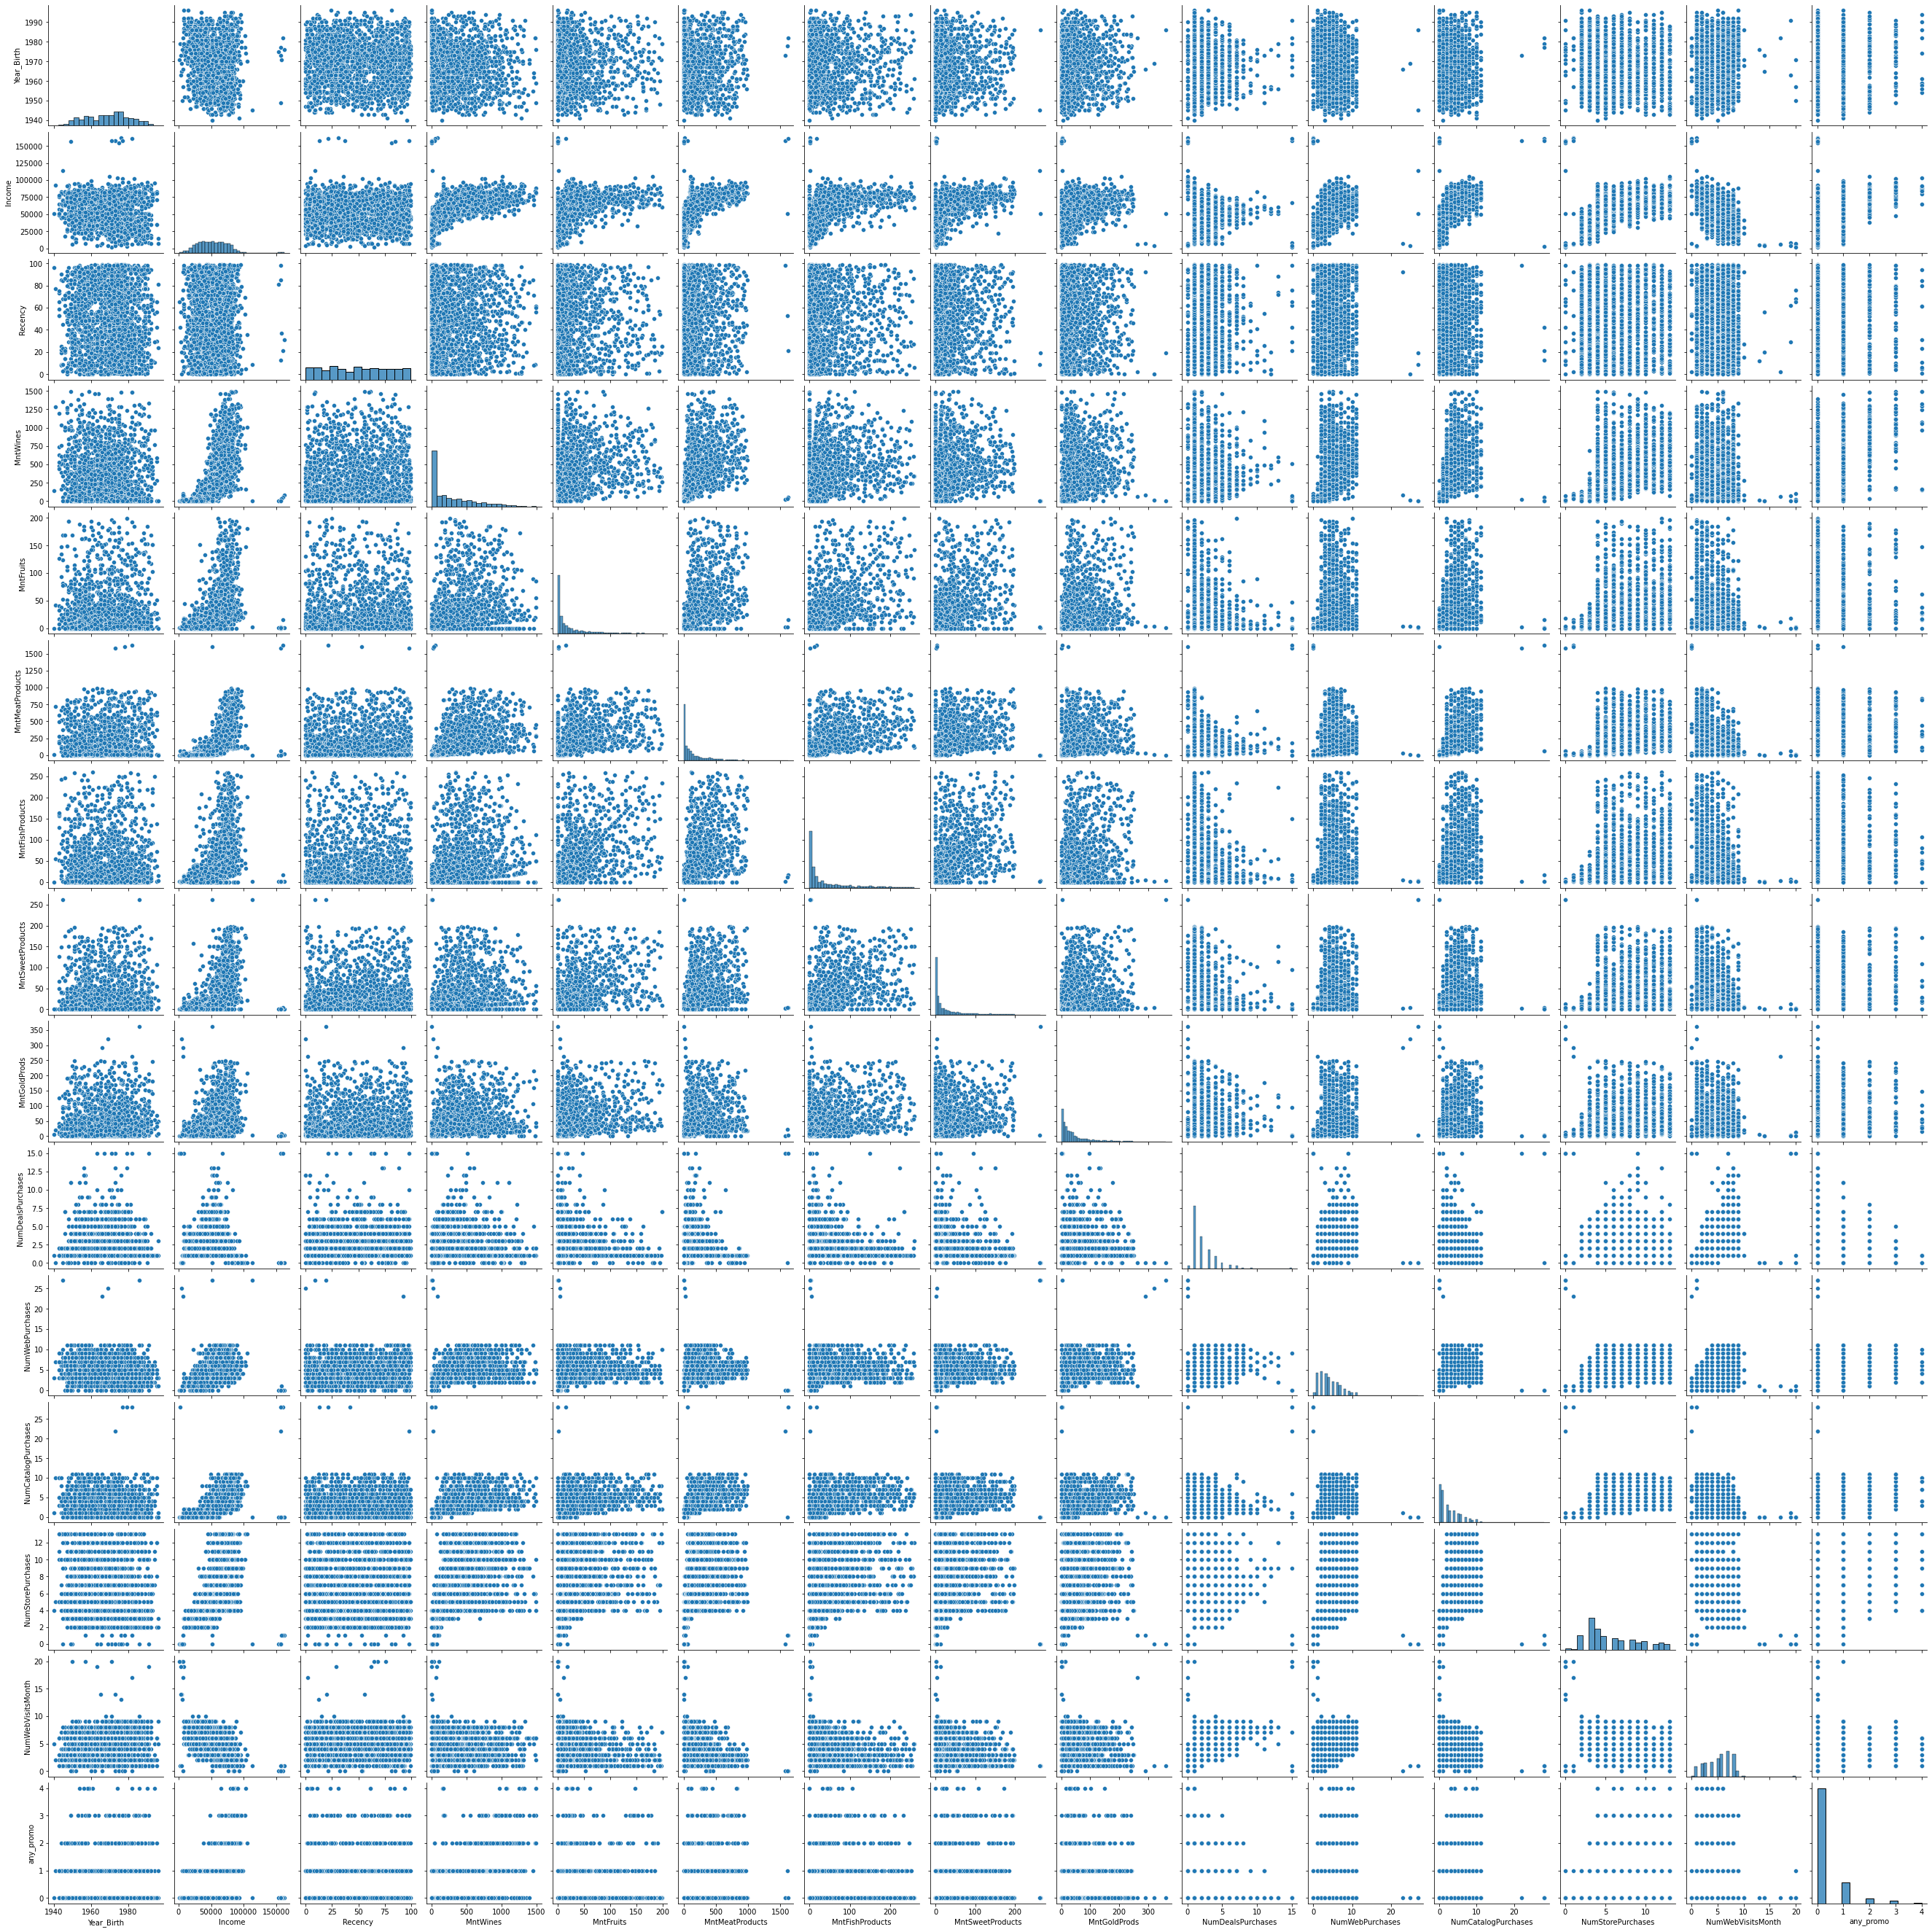

In [16]:
columns_to_plot=data_c[['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'any_promo']]
sns.pairplot(columns_to_plot)
# Income looks very clearly corrlated with purchases

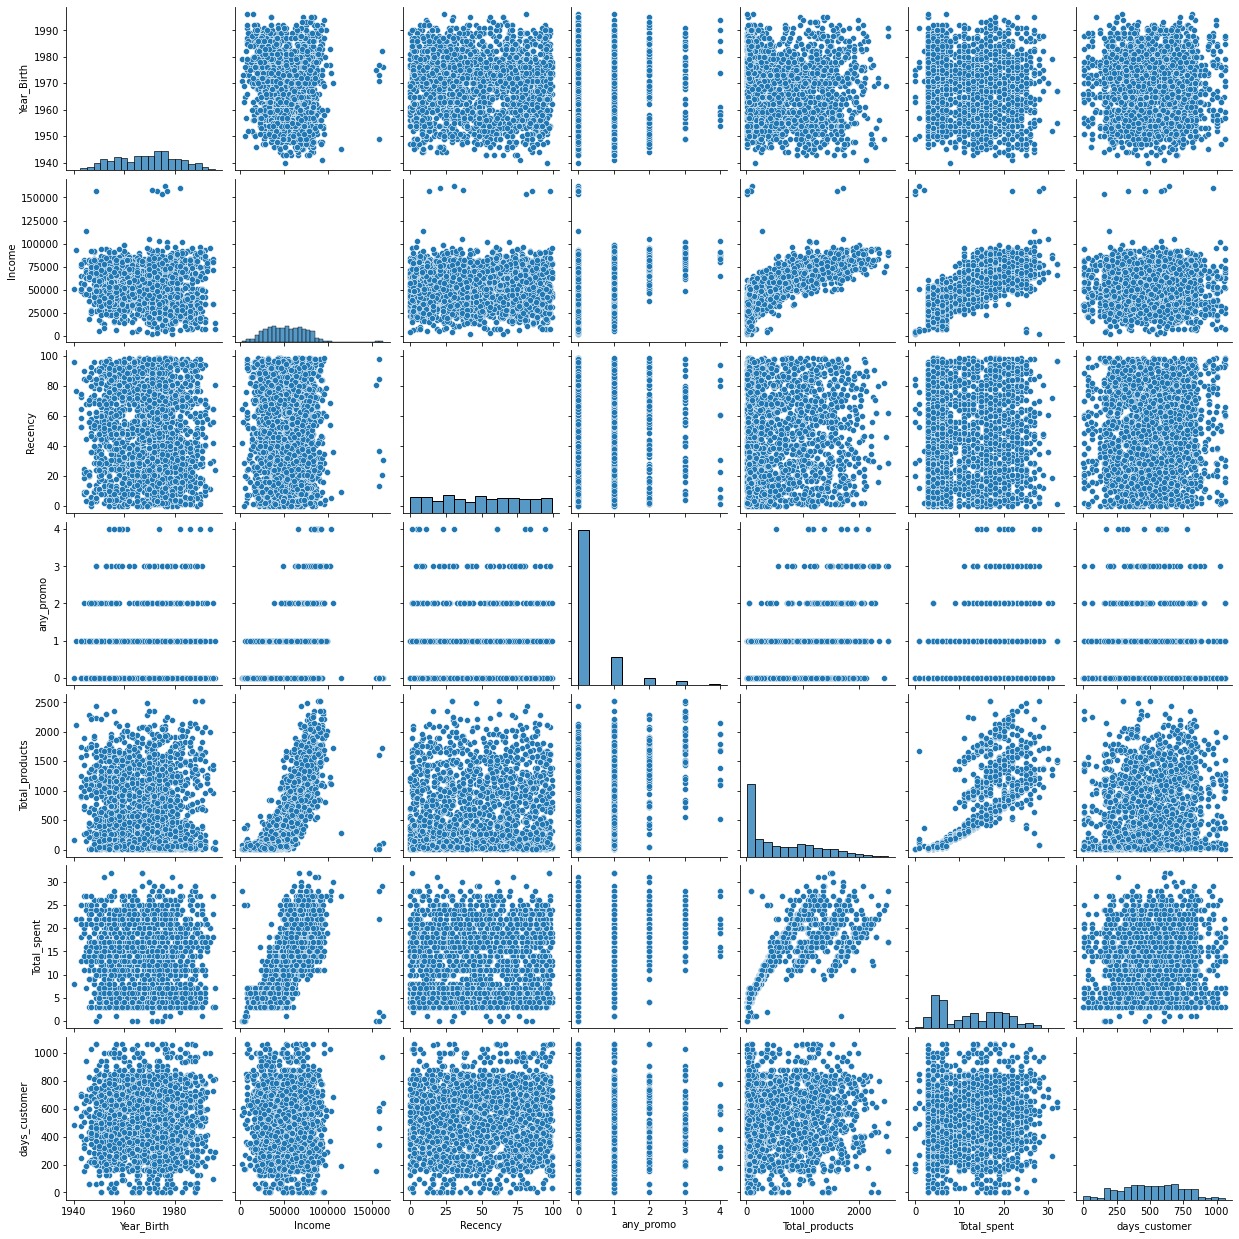

In [19]:
columns_to_plot=data_c[['Year_Birth', 'Income',  'Recency', 
       'any_promo', 'Total_products',
       'Total_spent', 'days_customer']]
sns.pairplot(columns_to_plot)
# Income looks very clearly corrlated with purchases

In [211]:
data_c.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'any_promo', 'Total_products',
       'Total_spent', 'years_customer'],
      dtype='object')

In [71]:
# Creating groups of features to explore. 
Products=[ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
Promotions=['NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'any_promo']
Places=['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Segmentation=['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

lists=[Products, Promotions, Places]
for group in Segmentation:
    for list_f in lists:
        print(data_c.groupby(group)[list_f].mean().T)
        print("   ")

Education           2n Cycle      Basic  Graduation      Master         PhD
MntWines          200.039801   7.240741  284.268855  333.075676  403.773196
MntFruits          29.213930  11.111111   30.774623   21.654054   19.793814
MntMeatProducts   142.597015  11.444444  176.546584  163.378378  167.791753
MntFishProducts    47.885572  17.055556   43.149956   32.100000   26.569072
MntSweetProducts   34.572139  12.111111   31.367347   21.175676   20.131959
MntGoldProds       46.726368  22.833333   50.849157   40.397297   31.915464
   
Education          2n Cycle     Basic  Graduation    Master       PhD
NumDealsPurchases  2.258706  1.796296    2.309672  2.427027  2.377320
AcceptedCmp3       0.074627  0.111111    0.069210  0.064865  0.082474
AcceptedCmp4       0.049751  0.000000    0.071872  0.083784  0.092784
AcceptedCmp5       0.049751  0.000000    0.076309  0.075676  0.078351
AcceptedCmp1       0.069652  0.000000    0.072760  0.048649  0.061856
AcceptedCmp2       0.009950  0.000000    0.0

<AxesSubplot:xlabel='Dt_Customer', ylabel='NumDealsPurchases'>

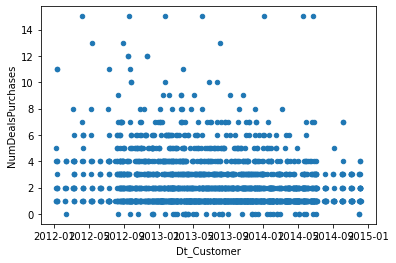

In [111]:
#Visuals: Z
data_c.Dt_Customer=pd.to_datetime(data_c.Dt_Customer)
data_c.plot(x='Dt_Customer', y='NumDealsPurchases', kind='scatter')
# The scatter plot liik more dense and a little higher in the middle which can say that older cutomers don't rely 
#on the deals and the new customer didn't have  the chnce to accumulate as many responces to deals.

<AxesSubplot:xlabel='Education'>

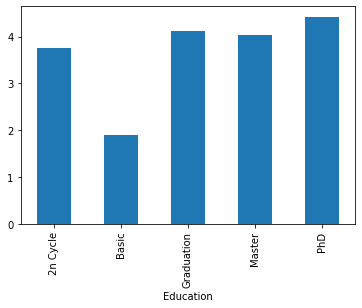

In [93]:
data_c.groupby('Education').NumWebPurchases.mean().plot.bar()
# Not a big difrence in education eccept people with basic, probaly mediated by income

<AxesSubplot:xlabel='Marital_Status'>

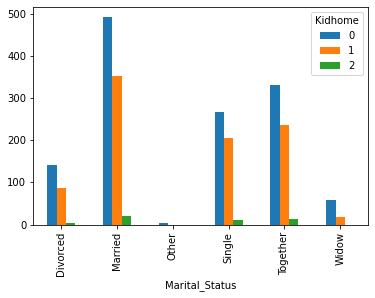

In [112]:
data_c.groupby('Marital_Status').Kidhome.value_counts().unstack().plot.bar()
# This shows that most cutomers are married with no children or one child , next there are single or in relationship people. 

<AxesSubplot:xlabel='Education'>

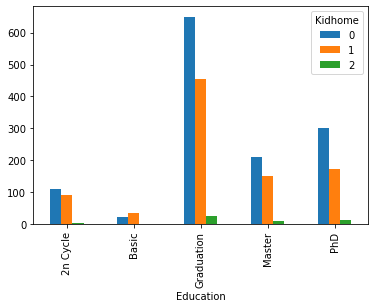

In [85]:
data_c.groupby('Education').Kidhome.value_counts().unstack().plot.bar()
# This shows that most cutomers are graduate lvel with no children or one child 

<AxesSubplot:xlabel='Education'>

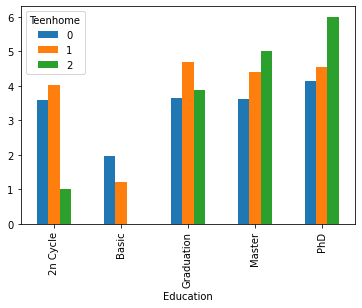

In [94]:
data_c.groupby(['Education', 'Teenhome']).NumWebPurchases.mean().unstack().plot.bar()
# Here we can see that more educated people with at least one teen at home purchase more on website. 

<AxesSubplot:xlabel='Education'>

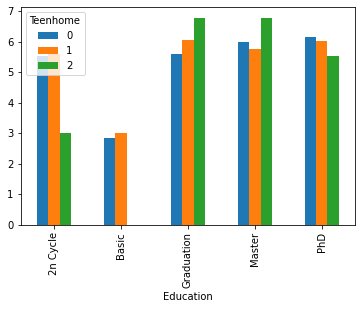

In [113]:
data_c.groupby(['Education', 'Teenhome']).NumStorePurchases.mean().unstack().plot.bar()
# also in store

<AxesSubplot:xlabel='Education'>

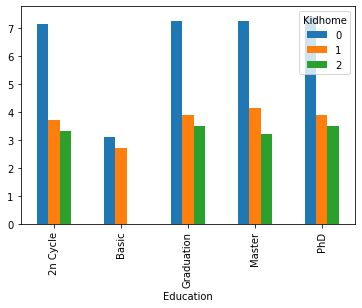

In [114]:
data_c.groupby(['Education', 'Kidhome']).NumStorePurchases.mean().unstack().plot.bar()
# With little kids, less go to the store

C:\Users\Diana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

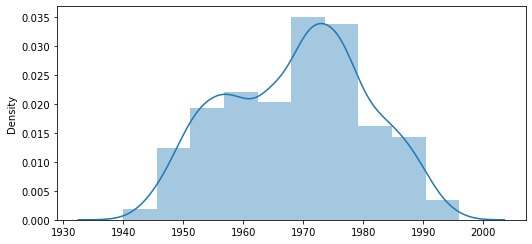

In [149]:
sns.distplot(x = data_c['Year_Birth'], bins = 10)

C:\Users\Diana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

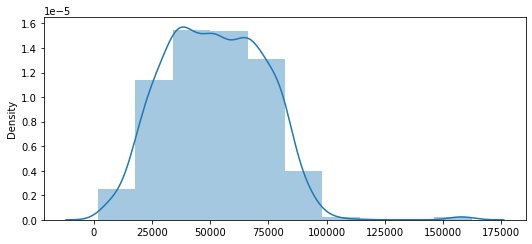

In [150]:
sns.distplot(x = data_c['Income'], bins = 10)

(1940.0, 2000.0)

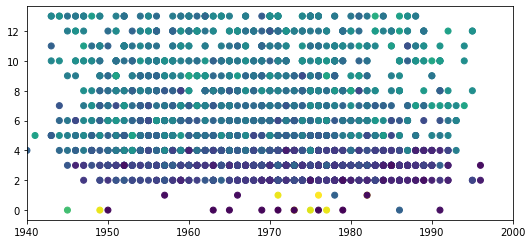

In [143]:
#age and income we can flip the view:

#data_c[['Year_Birth', 'Income']].info()

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x=data_c['Year_Birth''Year_Birth']
y=data_c['NumStorePurchases']
c=data_c['Income']
plt.scatter(x, y, c=c)
#plt.plot([1940, 2000])
plt.xlim([1940,2000])

# IT looks like store purcheses distributed evenly across ages accept on the older and younger ages which makes sence
# Also looks like mid level income make more in store purcheses and very high or very low income make less

In [ ]:
# People who complain don't buty less

<AxesSubplot:xlabel='Kidhome', ylabel='NumWebPurchases'>

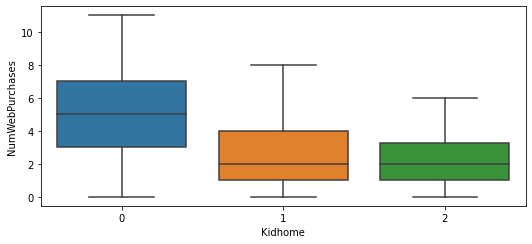

In [156]:
sns.boxplot(y = data_c['NumWebPurchases'], x = data_c['Kidhome'], showfliers=False)
#More web purcheses with no kids

In [161]:
#data_c.plot(x='NumWebPurchases', y='NumDealsPurchases', kind='scatter')


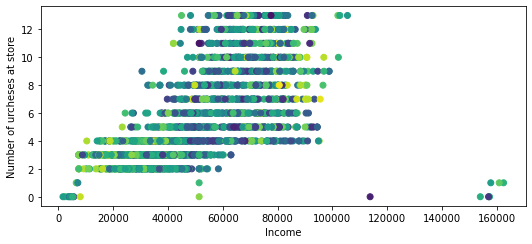

In [202]:
fig, ax = plt.subplots()
x=data_c['Income']
y=data_c['NumStorePurchases']
c=data_c['Year_Birth']
ax.scatter(x, y, c=c)
ax.set_xlabel('Income')
ax.set_ylabel('Number of purcheses at store')
plt.show()

In [ ]:
#PCA



C:\Users\Diana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

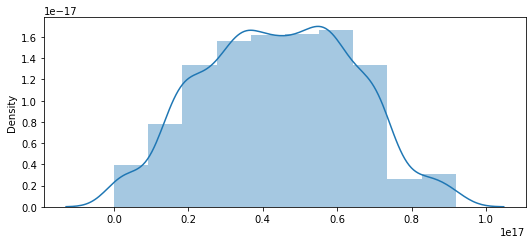

In [208]:
sns.distplot(x = data_c['years_customer'], bins = 10)

In [71]:
#There is a small but significant correlation between 
a=data_c['days_customer'].astype('int64')
b=data_c['Total_spent'].astype('int64')
corr, alpha = pearsonr(a,b)
print('Pearsons correlation: %.3f' % corr)
print("alpha:", alpha)

Pearsons correlation: 0.190
alpha: 1.1617639051278593e-19


C:\Users\Diana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_customer', ylabel='Total_spent'>

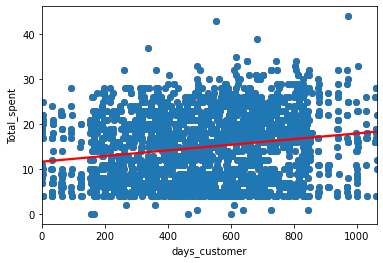

In [59]:
x=data_c['days_customer'].astype('int64')
y=data_c['Total_spent'].astype('int64')

plt.plot(x, y, 'o')

sns.regplot(x, y, ci=None, color='red')

# The longer the customer the more they spend!

In [21]:
data_c.to_csv('data_clean.csv')